In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

train = pd.read_excel("./result1_2.xlsx")
test = pd.read_csv("./long-customer-test.csv")
data = pd.read_csv("./short-customer-data.csv")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9180 non-null   int64  
 1   CreditScore      9180 non-null   int64  
 2   Gender           9180 non-null   int64  
 3   Age              9180 non-null   int64  
 4   Tenure           9180 non-null   int64  
 5   Balance          9180 non-null   float64
 6   NumOfProducts    9180 non-null   int64  
 7   HasCrCard        9180 non-null   int64  
 8   IsActiveMember   9180 non-null   int64  
 9   EstimatedSalary  9180 non-null   float64
 10  Exited           9180 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 789.0 KB


In [10]:
train.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1


# 3.1

In [11]:
train['Exited'].groupby(train['Age'])

x = train['Age']

train['Exited'].value_counts()


0    7343
1    1837
Name: Exited, dtype: int64

In [12]:
x.value_counts()

35    437
38    434
36    423
37    423
34    419
     ... 
84      2
92      2
83      1
82      1
88      1
Name: Age, Length: 69, dtype: int64

In [22]:
x.sort_values()


409     18
4109    18
2708    18
8492    18
2178    18
        ..
3371    84
8548    84
9095    88
7382    92
3663    92
Name: Age, Length: 9180, dtype: int64

In [24]:
"""
得到x轴
"""
x = train['Age']
x.sort_values()
x.value_counts()

train['Exited'].value_counts()

x1 = x.sort_values()

x_label = x1.drop_duplicates(keep='first', inplace=False)

In [32]:
# x_label , y_label

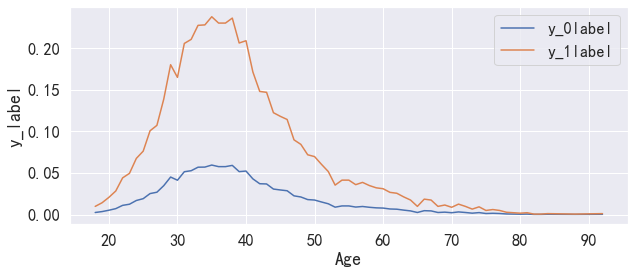

In [40]:
import seaborn as sns

df = pd.DataFrame()
df['Age'] = x_label
df['y_label'] = y_0label
df['y_1label'] = y_1label


plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei', font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
plt.figure(figsize=(10, 4))
sns.lineplot(x="Age", y='y_label', data=df, label='y_0label')

sns.lineplot(x="Age", y='y_1label', data=df, label='y_1label')

plt.show()

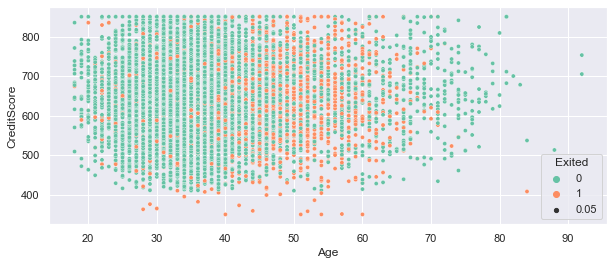

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()

"""
案例2：设置hue 根据设置的类别，产生颜色不同的点的散点图
eg.下图为根据time分类的散点图
"""
plt.figure(figsize=(10, 4))
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(x="Age", y="CreditScore", hue="Exited", size=0.05, data=train, palette="Set2", markers=markers)
plt.savefig("sandian")
plt.show()


In [44]:
train['Tenure'].value_counts()
train['Tenure']

2     954
1     952
8     938
5     938
7     937
3     917
4     914
9     909
6     890
10    447
0     384
Name: Tenure, dtype: int64

In [52]:
da = pd.DataFrame()
tenure = train['Tenure'].drop_duplicates(keep='first', inplace=False)
result = round(train['Tenure'].groupby(train["Exited"]).value_counts()[1][0] / train['Tenure'].value_counts()[0], 3)

result1 = []
for i in range(2):
    for j in range(11):
        result = round(train['Tenure'].groupby(train["Exited"]).value_counts()[i][j] / train['Tenure'].value_counts()[j], 3)
        result1.append(result)
        print(i, result)

0 0.779
0 0.777
0 0.811
0 0.796
0 0.796
0 0.791
0 0.8
0 0.841
0 0.81
0 0.783
0 0.801
1 0.221
1 0.223
1 0.189
1 0.204
1 0.204
1 0.209
1 0.2
1 0.159
1 0.19
1 0.217
1 0.199


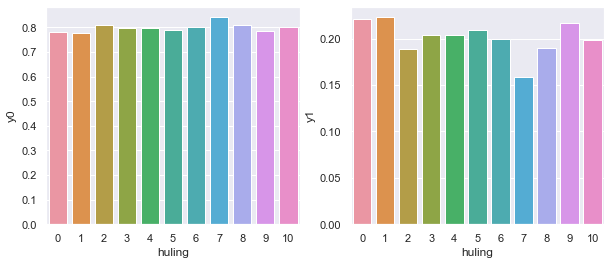

In [53]:
y0 = result1[:11]
y1 = result1[11:]

bf = pd.DataFrame()
bf['huling'] = tenure.sort_values().tolist()
bf['y0'] = y0
bf['y1'] = y1

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x="huling", y='y0', data=bf, label='y_1label')
plt.subplot(1,2,2)
sns.barplot(x="huling", y='y1', data=bf, label='y_1label')
plt.show()